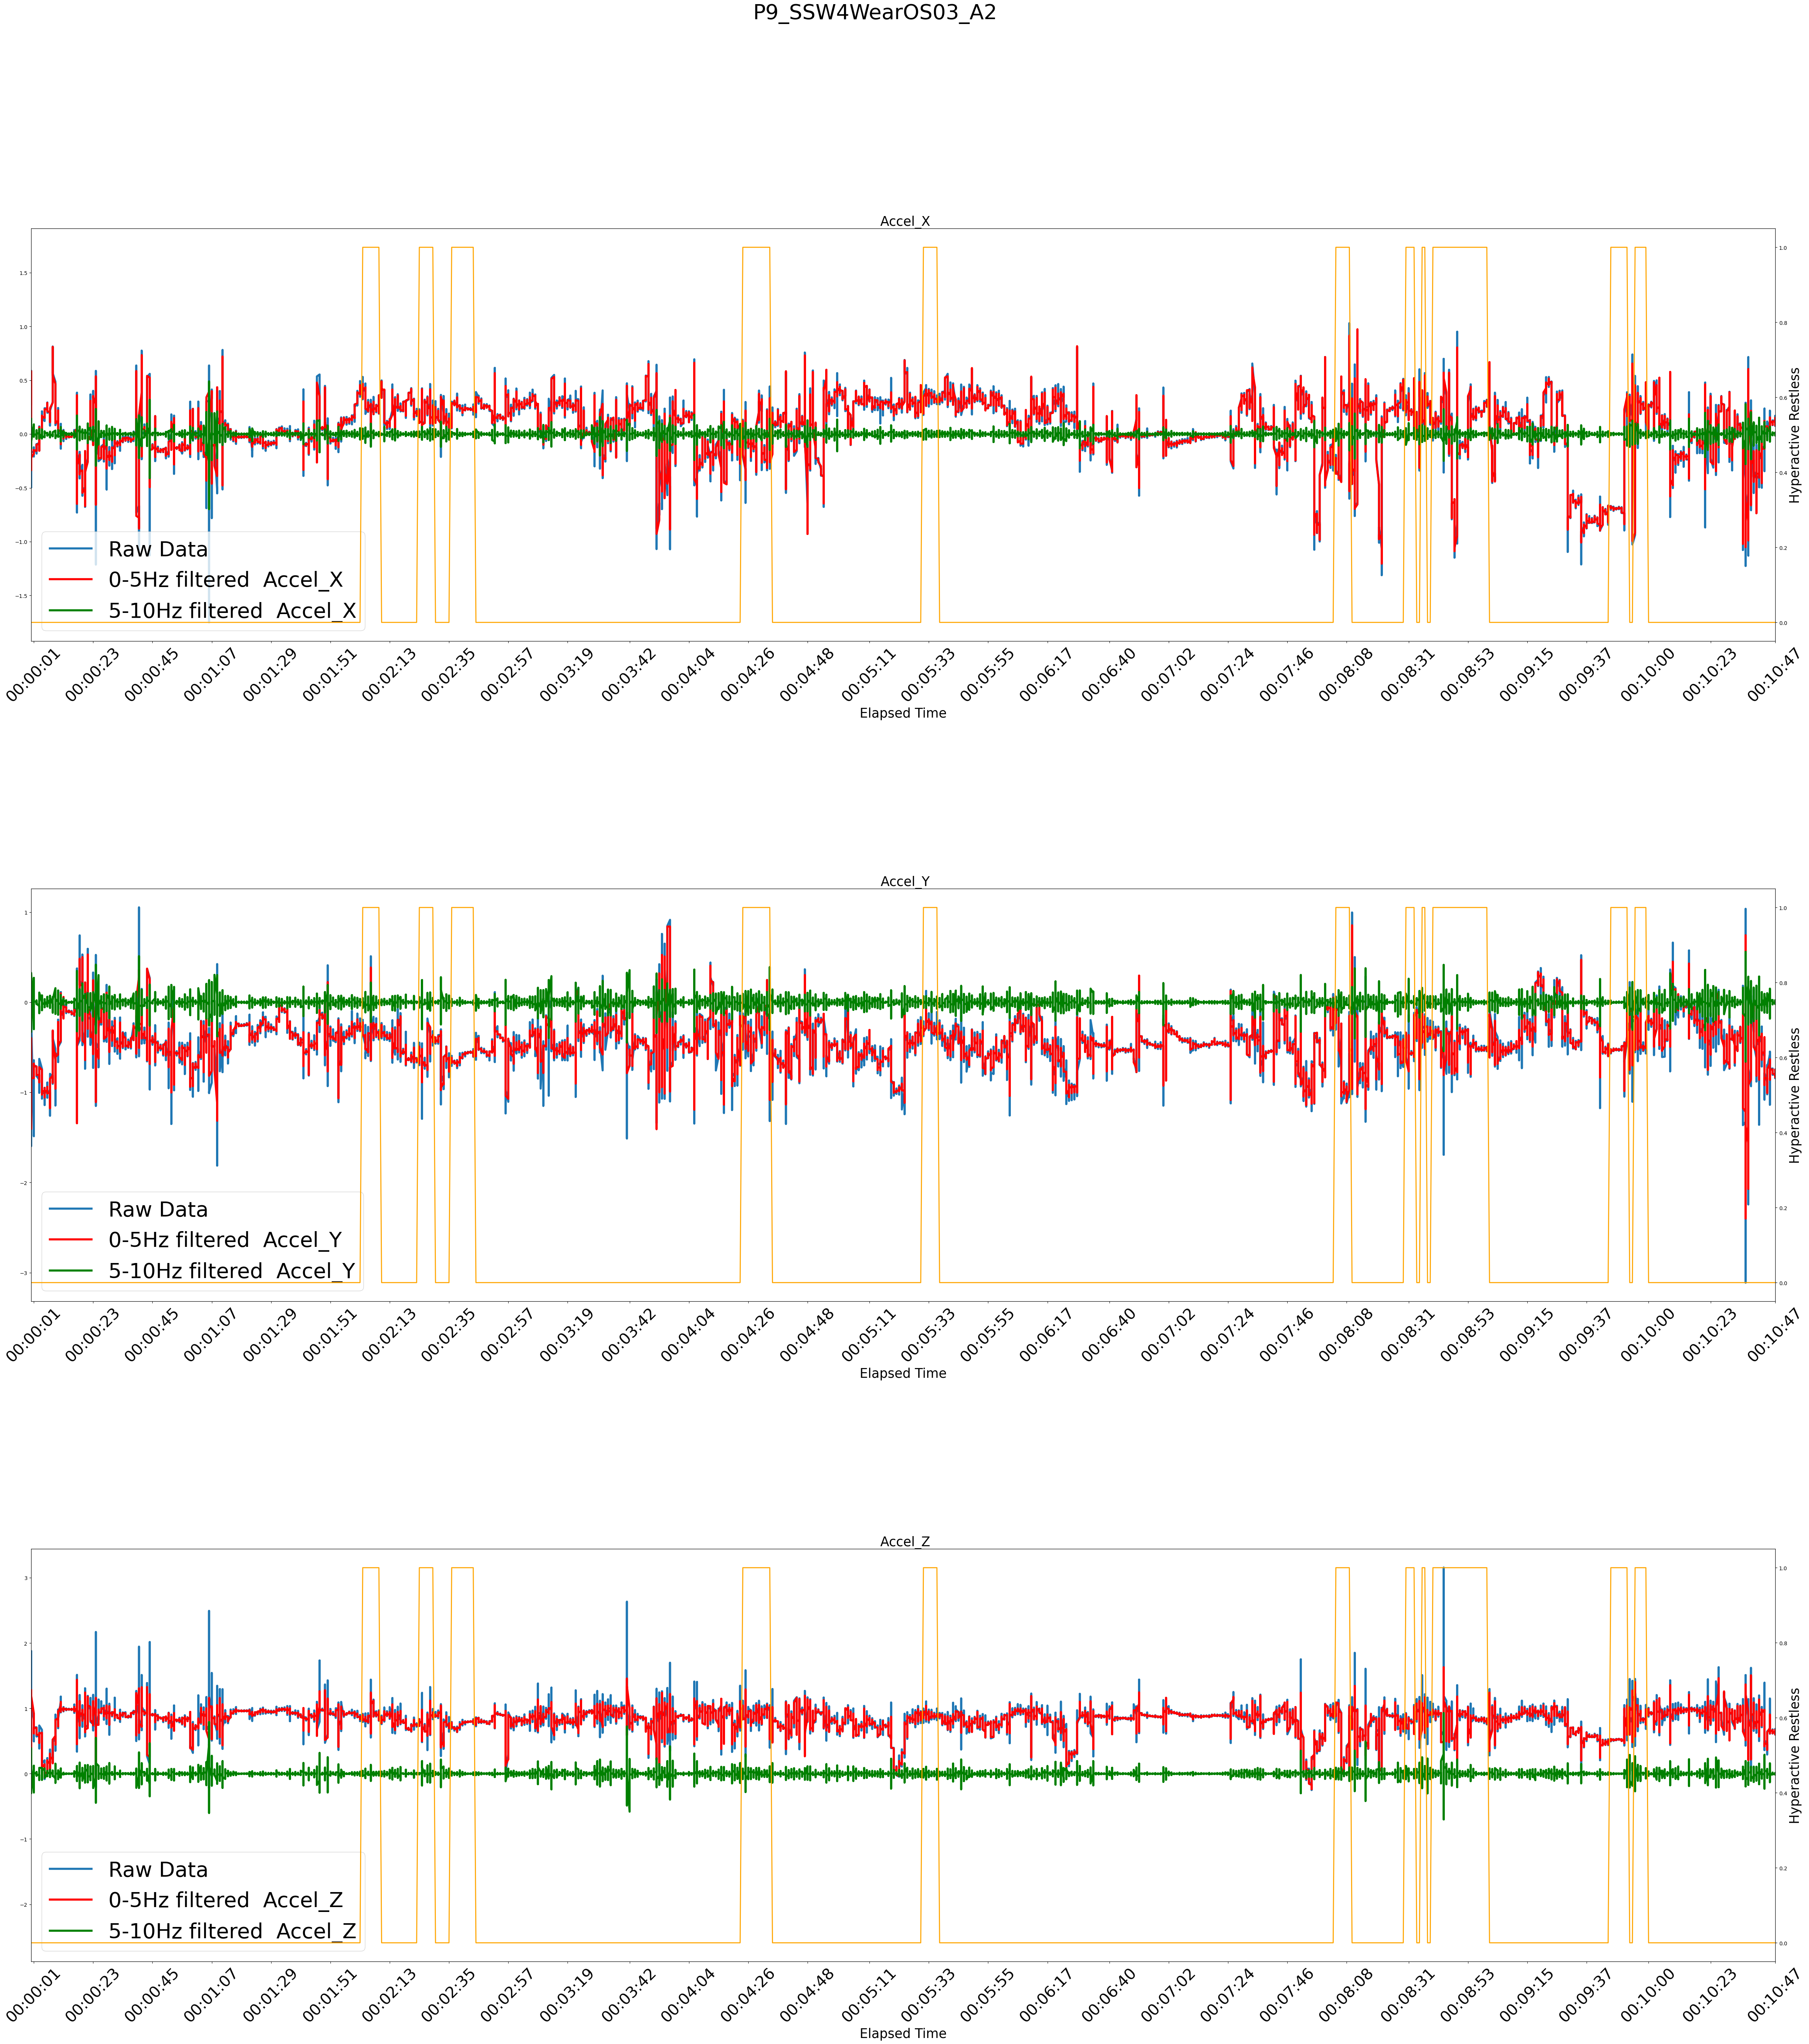

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, butter, filtfilt
import numpy as np


def calculate_sampling_frequency(dataframe):
    # Extract the 'timestamp' column as a NumPy array
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency

def to_seconds(time_str):
    return (pd.to_datetime(time_str) - pd.to_datetime('00:00:00')).total_seconds()

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    if high > 1:
        #high = 1
        print('No upper limit!')
        b, a = butter(order, low, btype='highpass')
        y = filtfilt(b, a, signal)
    else: 
        b, a = butter(order, [low, high], btype='bandpass')
        y = filtfilt(b, a, signal)
    return y

def lowpass_filter(signal, lowcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    b, a = butter(order, low, btype='lowpass')
    y = filtfilt(b, a, signal)
    return y

df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\syncedfiles\\result_P9_SSW4WearOS03_A2.csv')

df['Hyperactive_Restless'] = pd.to_numeric(df['Hyperactive_Restless'], errors='coerce')


fs = calculate_sampling_frequency(df)

column_index_behavior = 23  
column_data_behavior = df.iloc[:, column_index_behavior].replace(-100, 0)


columns = df.columns[4:13]
#df_filtered = pd.DataFrame()
for col in columns:
        df[f'{col}_0_5Hz'] = lowpass_filter(df[col], 5.0, fs)
for col in columns:
        df[f'{col}_5_10Hz'] = bandpass_filter(df[col], 5.0, 10.0, fs)
        
column_names = df.columns[4:7]
num_subplots = len(column_names)  
fig, axs = plt.subplots(num_subplots, 1, figsize=(60, 20 * num_subplots))


for i, column_name in enumerate(column_names, start=1):
    column_data = df[column_name]
    #column_data = df_filtered[column_name]
    #frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)
    #energy_spectrogram = np.sum(spectrogram_data, axis=0)

    # Create subplots
    ax1 = axs[i-1]
    ax1.plot(df['NewClock'], column_data, label='Raw Data', linewidth=4)
    #ax1.set_ylabel('Raw Data', fontsize=15)
    ax1.tick_params('y')


    #ax2 = ax1.twinx()
    ax1.plot(df['NewClock'], df[f'{column_name}_0_5Hz'], color='red', label=f'0-5Hz filtered {column_name}', linewidth=4)
    ax1.plot(df['NewClock'], df[f'{column_name}_5_10Hz'], color='green', label=f'5-10Hz filtered {column_name}', linewidth=4)

    #ax1.set_ylabel(f'0-5Hz filtered {column_name}', color='red', fontsize=15)
    ax2 = ax1.twinx()
    ax2.plot(df['NewClock'], column_data_behavior, color='orange', label='Hyperactive', linewidth=2)
    ax2.set_ylabel('Hyperactive Restless', fontsize=25)
    
    #  title
    ax1.set_title(f'{column_name}', fontsize=25)

    # x-axis limits for all subplots
    ax1.set_xlim(df['NewClock'].iloc[0], '00:10:00')

    # time axis 
    seconds = [to_seconds(time) for time in df["NewClock"]]
    interval = 600
    ax1.set_xticks(seconds[::interval])
    ax1.set_xticklabels(df["NewClock"][::interval], rotation=45, fontsize=30)
    ax1.set_xlabel('Elapsed Time', fontsize=25)


    ax1.legend(loc='lower left',fontsize=40)


fig.suptitle('P9_SSW4WearOS03_A2', fontsize=40)


fig.subplots_adjust(hspace=0.6)


plt.show()

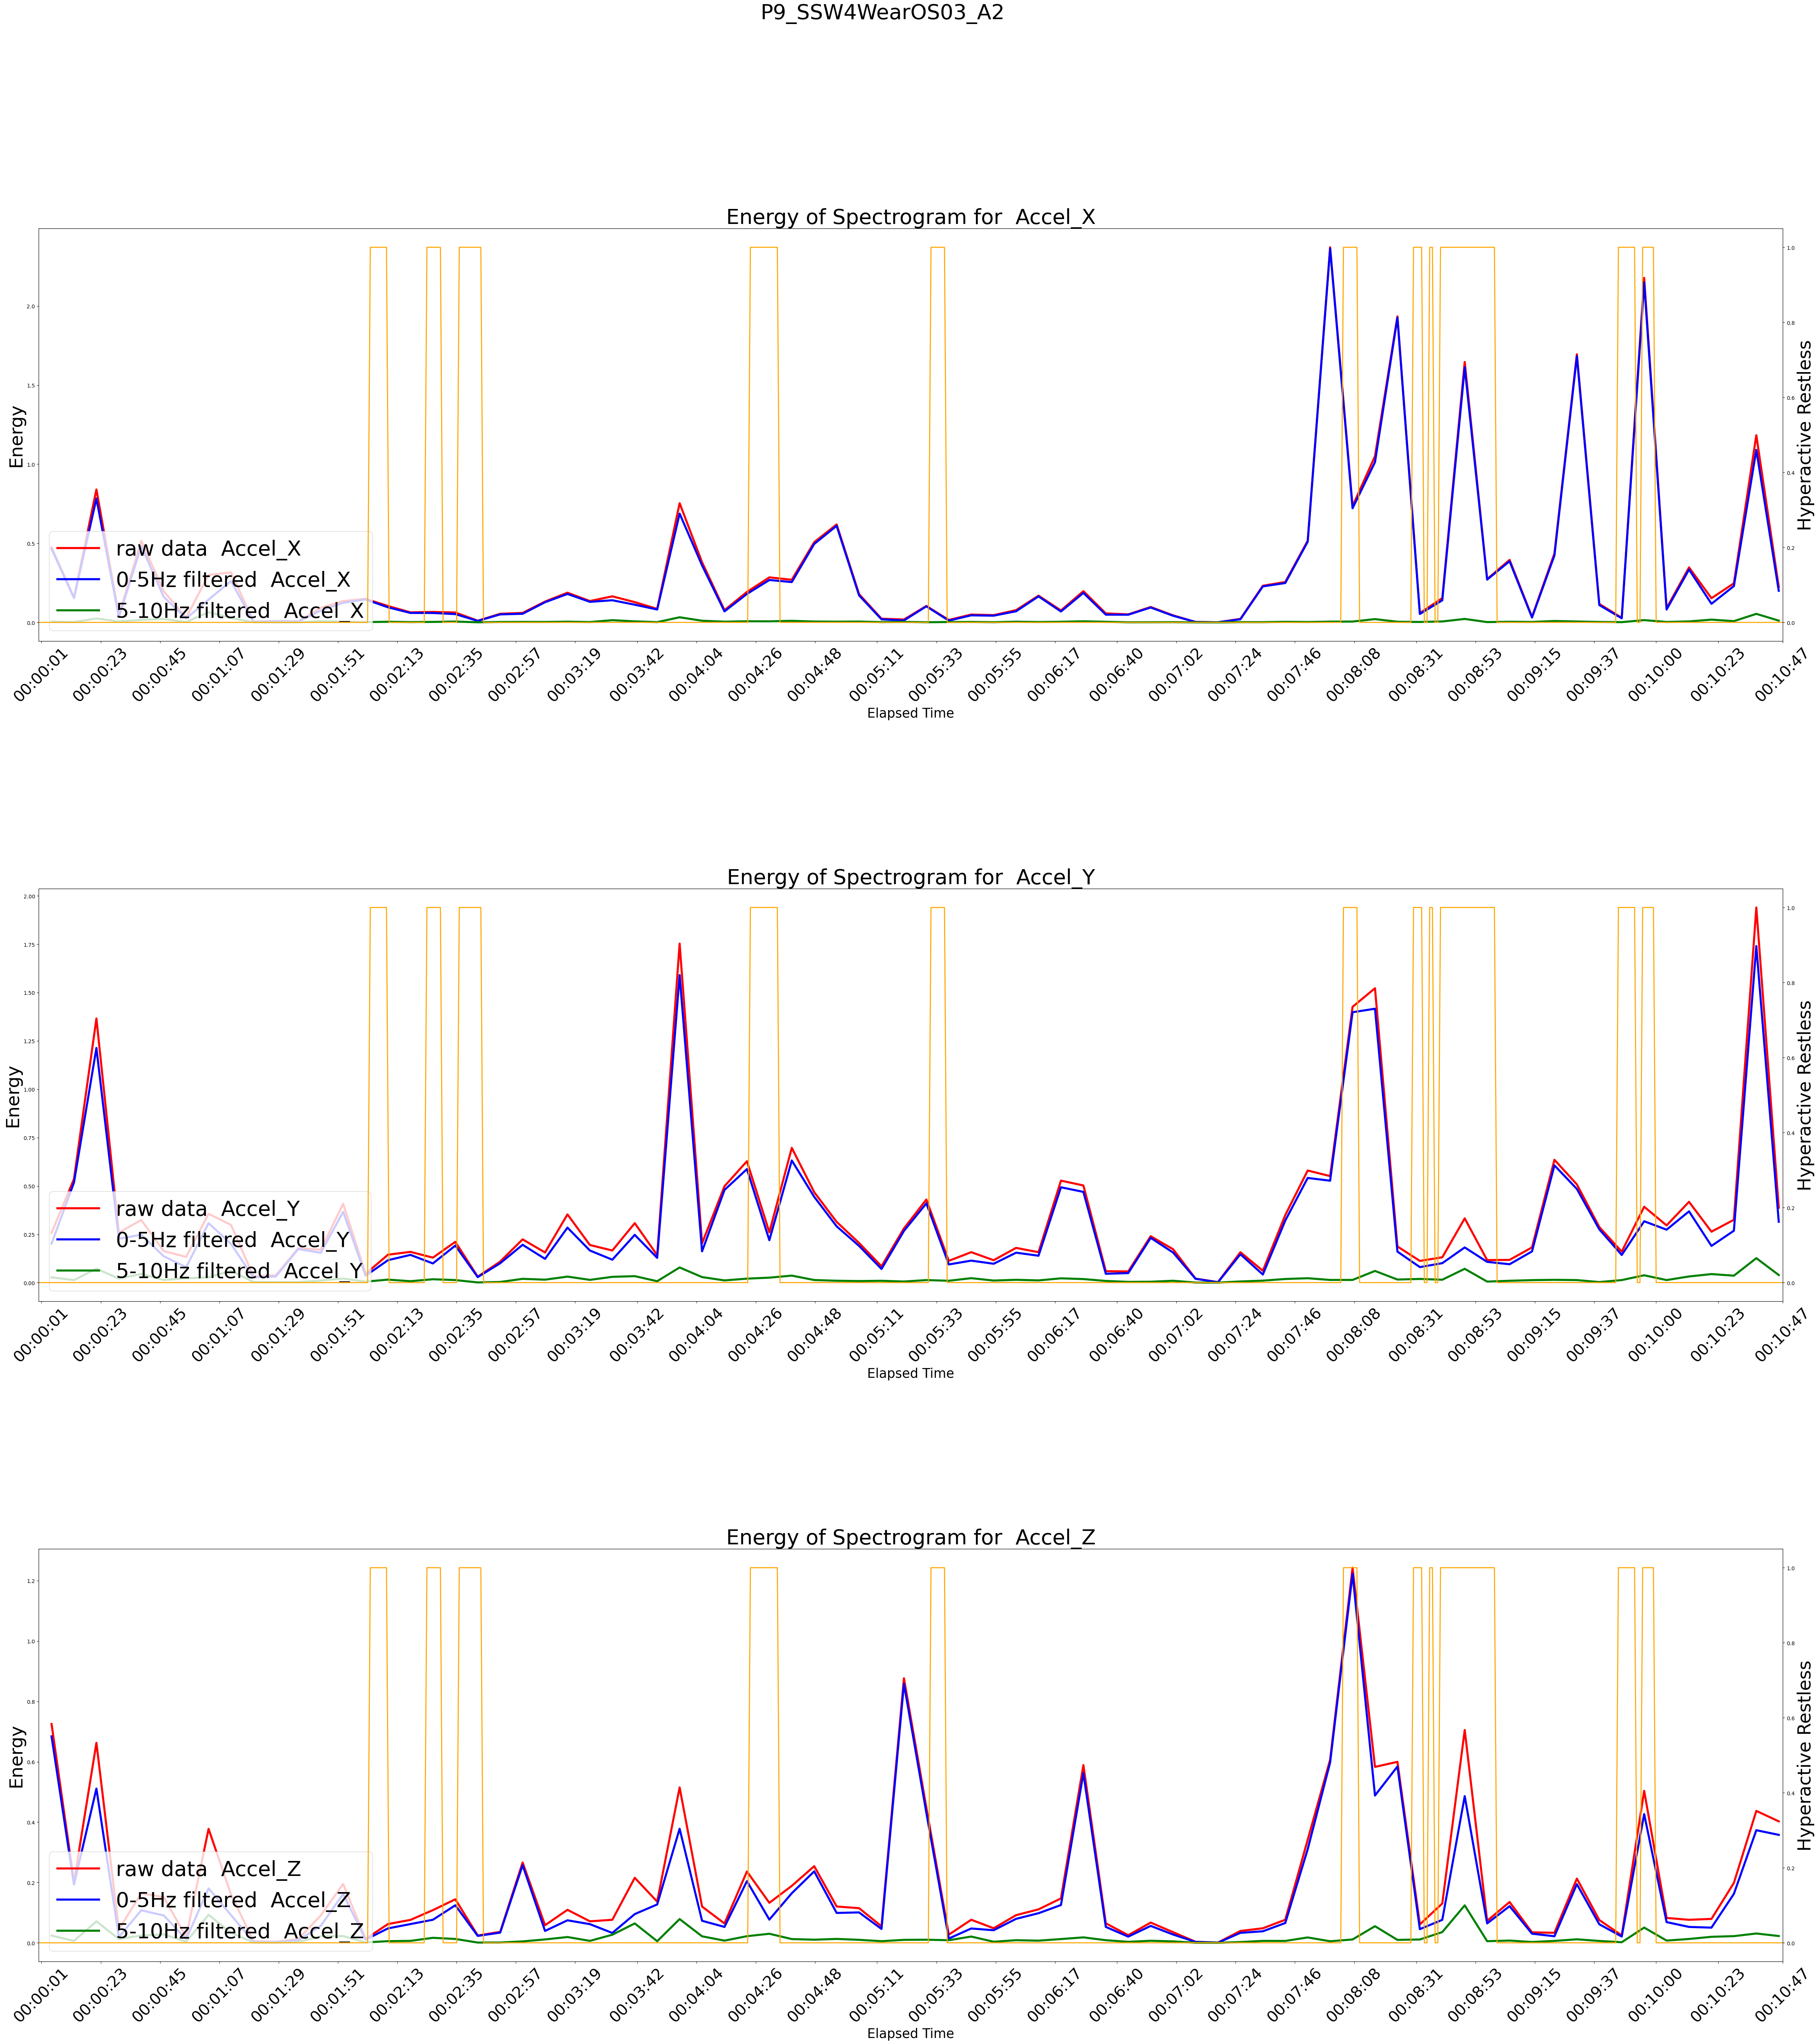

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, butter, filtfilt
import numpy as np

def calculate_sampling_frequency(dataframe):
    frequencies = dataframe['timestamp_str_seconds'].value_counts()
    average_frequency = sum(frequencies) / len(frequencies)

    return average_frequency

def to_seconds(time_str):
    return (pd.to_datetime(time_str) - pd.to_datetime('00:00:00')).total_seconds()

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    if high > 1:
        #high = 1
        print('No upper limit!')
        b, a = butter(order, low, btype='highpass')
        y = filtfilt(b, a, signal)
    else: 
        b, a = butter(order, [low, high], btype='bandpass')
        y = filtfilt(b, a, signal)
    return y

def lowpass_filter(signal, lowcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    b, a = butter(order, low, btype='lowpass')
    y = filtfilt(b, a, signal)
    return y



df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\syncedfiles\\result_P9_SSW4WearOS03_A2.csv')
df['Hyperactive_Restless'] = pd.to_numeric(df['Hyperactive_Restless'], errors='coerce')


fs = calculate_sampling_frequency(df)

column_index_behavior = 23  
column_data_behavior = df.iloc[:, column_index_behavior].replace(-100, 0)


columns = df.columns[4:7]
#df_filtered = pd.DataFrame()
for col in columns:
        df[f'{col}_0_5Hz'] = lowpass_filter(df[col], 5.0, fs)
for col in columns:
        df[f'{col}_5_10Hz'] = bandpass_filter(df[col], 5.0, 10.0, fs)
        
column_names = df.columns[4:7]
num_subplots = len(column_names)  
fig, axs = plt.subplots(num_subplots, 1, figsize=(60, 20 * num_subplots))




for i, column_name in enumerate(column_names, start=1):
    
    column_data = df[column_name]
    #column_data = df_filtered[column_name]
    frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)
    energy_spectrogram = np.sum(spectrogram_data, axis=0)
    # subplots
    ax1 = axs[i-1]
    ax1.plot(times, energy_spectrogram, color='red', label=f'raw data {column_name}',linewidth=4)
    #ax1.set_ylabel(f'Energy of Spectrogram {column_name}', color='red')
    #ax1.plot(df['NewClock'], column_data, label='Raw Data', linewidth=4)
    ax1.set_ylabel('Energy', fontsize=35)
    ax1.tick_params('y')

   
    #ax2 = ax1.twinx()
    column_data = df[f'{column_name}_0_5Hz']
    #column_data = df_filtered[column_name]
    frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)
    energy_spectrogram = np.sum(spectrogram_data, axis=0)
    ax1.plot(times,energy_spectrogram , color='blue', label=f'0-5Hz filtered {column_name}', linewidth=4)
    column_data = df[f'{column_name}_5_10Hz']
    #column_data = df_filtered[column_name]
    frequencies, times, spectrogram_data = spectrogram(column_data, fs=fs)
    energy_spectrogram = np.sum(spectrogram_data, axis=0)
    ax1.plot(times, energy_spectrogram, color='green', label=f'5-10Hz filtered {column_name}', linewidth=4)

    #ax1.set_ylabel(f'0-5Hz filtered {column_name}', color='red', fontsize=15)
    ax2 = ax1.twinx()
    ax2.plot(df['NewClock'], column_data_behavior, color='orange', label='Hyperactive', linewidth=2)
    ax2.set_ylabel('Hyperactive Restless', fontsize=35)
    
    ax1.set_title(f'Energy of Spectrogram for {column_name}', fontsize=40)
    # Set x-axis limits for all subplots
    ax1.set_xlim(df['NewClock'].iloc[0], '00:10:00')

   
    seconds = [to_seconds(time) for time in df["NewClock"]]
    interval = 600
    ax1.set_xticks(seconds[::interval])
    ax1.set_xticklabels(df["NewClock"][::interval], rotation=45, fontsize=30)
    ax1.set_xlabel('Elapsed Time', fontsize=25)

    
    ax1.legend(loc='lower left',fontsize=40)


fig.suptitle('P9_SSW4WearOS03_A2', fontsize=40)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.6)


plt.show()

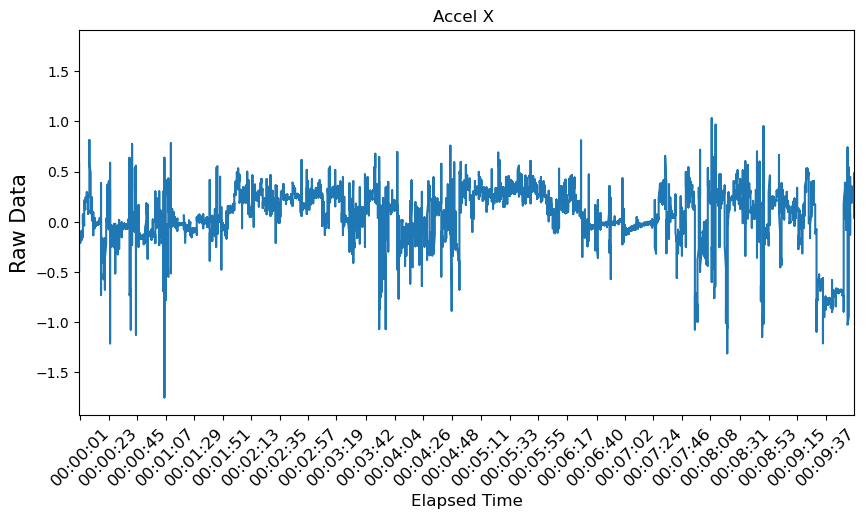

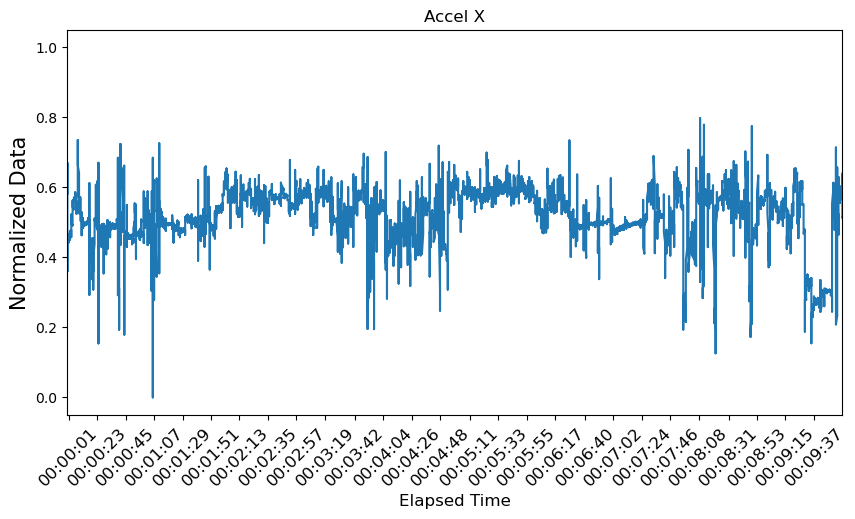

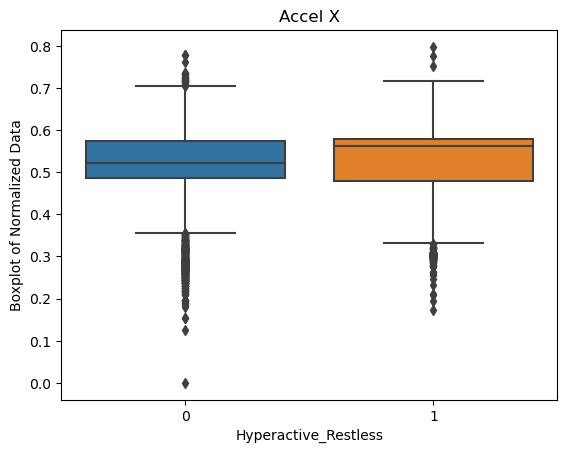

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.read_csv('C:\\Users\\fried\\Documents\\URI\\ELE_591\\syncedfiles\\syncedfiles\\result_P9_SSW4WearOS03_A2.csv')
df_plot = df.iloc[:, 4]

plt.figure(figsize=(10, 5))
#plt.subplot(1, 3, 1)
plt.title('Accel X ')
plt.plot(df['NewClock'], df_plot)
#plt.xlabel('Elapsed Time', fontsize=25)
plt.ylabel('Raw Data', fontsize=15)


seconds = [to_seconds(time) for time in df["NewClock"]]
interval = 600
plt.xticks(seconds[::interval], df["NewClock"][::interval], rotation=45, fontsize=12)
plt.xlabel('Elapsed Time', fontsize=12)
plt.xlim(df['NewClock'].iloc[0], '00:10:00')


df_normalized = pd.DataFrame(scaler.fit_transform(df.iloc[:, 4].values.reshape(-1, 1)), columns=[df.columns[4]])
#normalized_data = (df['Column3'] - df['Column3'].mean()) / df['Column3'].std()
#plt.subplot(1, 3, 2)
plt.figure(figsize=(10, 5))
plt.title('Accel X')
plt.plot(df['NewClock'],df_normalized)
#plt.xlabel('Elapsed Time', fontsize=25)
plt.ylabel('Normalized Data', fontsize=15)


seconds = [to_seconds(time) for time in df["NewClock"]]
interval = 600
plt.xticks(seconds[::interval], df["NewClock"][::interval], rotation=45, fontsize=12)
plt.xlabel('Elapsed Time', fontsize=12)
plt.xlim(df['NewClock'].iloc[0], '00:10:00')


#plt.subplot(1, 3, 3)
df_normalized['Hyperactive_Restless'] = df['Hyperactive_Restless']  # Add the missing column
df_normalized_filtered = df_normalized[df_normalized['Hyperactive_Restless'] != -100]
df_filtered = df[df['Hyperactive_Restless'] != -100]
plt.figure()#(figsize=(10, 5))
plt.title('Accel X')
sns.boxplot(data=df_normalized_filtered, x='Hyperactive_Restless', y=df_normalized_filtered.iloc[:,0])
#sns.boxplot(data=df_filtered, x='Hyperactive_Restless', y=df_filtered.iloc[:,4])
plt.ylabel('Boxplot of Normalized Data')


plt.show()

In [29]:
df_filtered.head()

level_0  index                       DataTS                      EventTS  \
0     1063   1063   05/07/2023 09:02:00.019 AM   01/01/0001 12:00:00.000 AM   
1     1064   1064   05/07/2023 09:02:00.057 AM   01/01/0001 12:00:00.000 AM   
2     1065   1065   05/07/2023 09:02:00.096 AM   01/01/0001 12:00:00.000 AM   
3     1066   1066   05/07/2023 09:02:00.131 AM   01/01/0001 12:00:00.000 AM   
4     1067   1067   05/07/2023 09:02:00.171 AM   01/01/0001 12:00:00.000 AM   

    Accel_X   Accel_Y   Accel_Z   Gyro_X   Gyro_Y   Gyro_Z  ...  NewClock  \
0     0.278    -0.941     0.047    1.538    0.089    0.037  ...  00:00:01   
1     0.340    -0.840     0.246    1.396   -0.501    0.228  ...  00:00:01   
2     0.435    -0.943     0.288    0.176   -0.983    0.332  ...  00:00:01   
3     0.519    -1.171     0.210   -0.287   -0.996    0.224  ...  00:00:01   
4     0.587    -1.113     0.173    0.909   -0.602    0.073  ...  00:00:01   

   Elapsed_Time  OffSeat  Hyperactive_Restless  HyperactiveBehaviourType  \
0       0:00:01        0                     0                       NaN   
1       0:00:01        0                     0                       NaN   
2       0:00:01        0                     0                       NaN   
3       0:00:01        0                     0                       NaN   
4       0:00:01        0                     0                       NaN   

   SecondHyperactiveBehaviourType Inattentive Inattentive.1 SecondInattentive  \
0                             NaN           0           NaN               NaN   
1                             NaN           0           NaN               NaN   
2                             NaN           0           NaN               NaN   
3                             NaN           0           NaN               NaN   
4                             NaN           0           NaN               NaN   

  new_zeroTS  
0   00:00:01  
1   00:00:01  
2   00:00:01  
3   00:00:01  
4   00:00:01  

[5 rows x 30 columns]